## mtala 2 solution:
### name of students:

עמיר פאעור תז 316540467

עדן דוקצייב תז 316365733

In [138]:
id1 = "316540467"
id2 = "316365733 "

name_student_1 = "Ameer Faour"
name_student_2 = "Eden Duktzayev"

import pandas as pd
df = pd.DataFrame([id1,id2])
# Uncomment in case two students are doing the assignment together
df = pd.DataFrame([id1])
#df = pd.DataFrame([id1,id2])
df.to_clipboard(index=False,header=False)

---
q1  
we open the vaccination using the website , and we save our country in Argentina , and we used head to show the first 3 rows

In [139]:
vac_file=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
Argentina=vac_file[vac_file["location"].str.contains("Argentina")]
Argentina.head(3)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
511,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
512,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0
513,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0


---
q2  
We used sum and then we find the maximum index

In [140]:
MaxNan=Argentina.isnull().sum().idxmax()
c=Argentina.isnull().sum().max()
print("the number is:",c,"\nand the max column is :",MaxNan)

the number is: 31 
and the max column is : daily_vaccinations_raw


---
q3  
we used isnull to find the row with the empty value, and we save it so we can use the index next question

In [141]:
index_with_Nan=Argentina[Argentina["daily_vaccinations"].isnull()]
index_with_Nan


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
511,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


---
q4  
first we create a copy because we cant change the main dataframe , second,because the empty value is the first day when Argentina started to vaccinate the people , and all of the values at this day is empty , but because we understand our dataframe , we see that at the first day the total vaccination is 700 , so we claim that probably the country didnt filled all values , the country filled only the total vaccination at the first day , thats why we fill the daily_vaccinations empty value with the total vaccination that happend at that day  
_We add an if statement to make sure that if there another Nan filled in the next days, it will not fill it with the number 700 ,at it will onlu fill the Nan with the first day (we used item function to change the type of the index from int64 to int_

In [142]:
Argentina_Without_Na=Argentina.copy()
x=Argentina["total_vaccinations"][index_with_Nan.index]
if Argentina_Without_Na["date"][index_with_Nan.index.item()]=='2020-12-29':
    Argentina_Without_Na["daily_vaccinations"].fillna(x,inplace=True)
Argentina_Without_Na


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
511,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,700.0,0.00,NaN,NaN,NaN
512,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0
513,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0
514,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0
515,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...
616,Argentina,ARG,2021-04-13,5571878.0,4836246.0,735632.0,181878.0,166815.0,12.33,10.70,1.63,3691.0
617,Argentina,ARG,2021-04-14,5754919.0,4996672.0,758247.0,183041.0,169014.0,12.73,11.06,1.68,3740.0
618,Argentina,ARG,2021-04-15,5935146.0,5163344.0,771802.0,180227.0,166276.0,13.13,11.42,1.71,3679.0
619,Argentina,ARG,2021-04-16,6093016.0,5305604.0,787412.0,157870.0,162428.0,13.48,11.74,1.74,3594.0


##### from now om , we are working on a dataframe the we fill in the empty values in daily_vaccinations

---
q5
we creat a graph the shows the histogram for the "people_vaccinated","total_vaccinations" together  , and we made the graph look brighter so it can be readable 

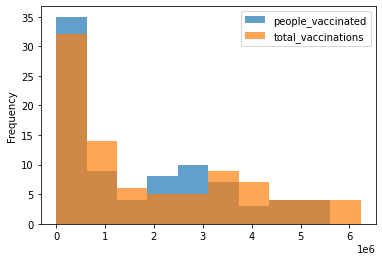

In [11]:
Argentina_Without_Na[["people_vaccinated","total_vaccinations"]].plot.hist(alpha=0.7)

---
q6  
we create a boxplot that has an green line that shows the median of people_fully_vaccinated_per_hundred

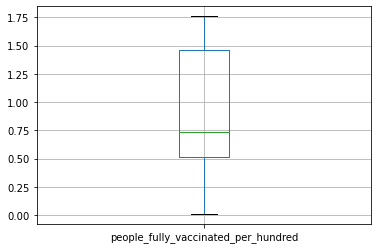

In [12]:
Argentina_Without_Na[["people_fully_vaccinated_per_hundred"]].boxplot()

---
q7  
first we changed the type of date columns from object to date.  
second, we add a month columns just like the way we learn  
we used groupby and max functions to show the maximum values in each month 

In [13]:
Argentina_Without_Na['date']=pd.to_datetime(Argentina_Without_Na.date)
Argentina_Without_Na['month'] = pd.DatetimeIndex(Argentina_Without_Na.date).month
maxVaccinations=Argentina_Without_Na.groupby("month")[["people_vaccinated_per_hundred","daily_vaccinations"]].max()
maxVaccinations

,people_vaccinated_per_hundred,daily_vaccinations
month,,
1,0.62,14788.0
2,1.62,43534.0
3,7.11,127666.0
4,12.02,169014.0
12,NaN,15656.0


---
q8  
we used sort_values to sort by the column people_vaccinated_per_hundred from the smallest value to the greater value

In [14]:
maxVaccinations.sort_values("people_vaccinated_per_hundred")

,people_vaccinated_per_hundred,daily_vaccinations
month,,
1,0.62,14788.0
2,1.62,43534.0
3,7.11,127666.0
4,12.02,169014.0
12,NaN,15656.0
